# Ridge regression
### dataset - Boston Housing Dataset
- 가중치의 모든 원소가 0에 가깝게 만드는 동시 모든 출력에 주는 영향을 최소한으로 만들어본다. (regularization)

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
import sklearn
import sklearn.model_selection
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn.datasets import load_boston

### 1) data handling

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
print(bos.describe())

               0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [8]:
bos['PRICE'] = boston.target
print(bos.head())

         0     1     2    3      4      5     6       7    8      9    10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  PRICE  
0  396.90  4.98   24.0  
1  396.90  9.14   21.6  
2  392.83  4.03   34.7  
3  394.63  2.94   33.4  
4  396.90  5.33   36.2  


In [9]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in boston.data])
y = boston.target

### 2) Simple Linear Regression

In [10]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = linreg.predict(x)
# Now we can constuct a vector of errors, absolute value
err = abs(p-y)

# Let's see the error on the first 10 predictions
print(err[:10])

[6.00821269 3.4298606  4.1297683  4.79185945 8.25711768 3.44059952
 0.10433994 7.5652442  4.98303461 0.01981483]


In [13]:
# Dot product of error vector with itself gives us the sum of squared errors
# 메트릭스 곱. dot()
# p = predict
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(p))
print(rmse_train)

4.679506300635516


In [15]:
# We can view the regression coefficients
print('Regression Coefficients: \n', linreg.coef_)

Regression Coefficients: 
 [-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01  0.00000000e+00]


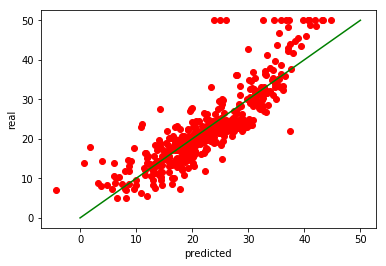

In [17]:
# Plot outputs
# p = predict / y = target
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,50],[0,50], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [18]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    # p = np.array([linreg.predict(xi) for xi in x[test]])
    p = linreg.predict(x[test])
    # e = error
    e = p-y[test]
    xval_err += np.dot(e,e)

# 10 fold 한 cross validation 값들의 rmse
rmse_10cv = np.sqrt(xval_err/len(x))

In [19]:
# training 의 RMSE 와 10-fold Cross validation 의 RMSE 값.

method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 4.6795
RMSE on 10-fold CV: 5.8819


### 3) Ridge Regression
- alpha 파라미터 0.5 (ridge coefficient)

In [20]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

# Train the model using the training set
ridge.fit(x,y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
# Compute RMSE on training data
# p = np.array([ridge.predict(xi) for xi in x])
p = ridge.predict(x)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    ridge.fit(x[train],y[train])
    p = ridge.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 4.6857
RMSE on 10-fold CV: 5.8428


In [22]:
# We can try different values of alpha and observe the impact on x-validation RMSE
print('Ridge Regression')
print('alpha\t RMSE_train\t RMSE_10cv\n')
alpha = np.linspace(.01,20,50)
t_rmse = np.array([])
cv_rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    
    # computing the RMSE on training data
    ridge.fit(x,y)
    p = ridge.predict(x)
    err = p-y
    total_error = np.dot(err,err)
    rmse_train = np.sqrt(total_error/len(p))

    # computing RMSE using 10-fold cross validation
    kf = KFold(len(x), n_folds=10)
    xval_err = 0
    for train, test in kf:
        ridge.fit(x[train], y[train])
        p = ridge.predict(x[test])
        err = p - y[test]
        xval_err += np.dot(err,err)
    rmse_10cv = np.sqrt(xval_err/len(x))
    
    t_rmse = np.append(t_rmse, [rmse_train])
    cv_rmse = np.append(cv_rmse, [rmse_10cv])
    print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 4.6795		 5.8806
0.418	 4.6842		 5.8467
0.826	 4.6921		 5.8319
1.234	 4.7000		 5.8234
1.642	 4.7070		 5.8175
2.050	 4.7133		 5.8126
2.458	 4.7187		 5.8082
2.866	 4.7234		 5.8041
3.274	 4.7276		 5.8000
3.682	 4.7313		 5.7960
4.090	 4.7346		 5.7920
4.498	 4.7375		 5.7880
4.906	 4.7402		 5.7840
5.313	 4.7426		 5.7800
5.721	 4.7448		 5.7760
6.129	 4.7469		 5.7720
6.537	 4.7488		 5.7680
6.945	 4.7505		 5.7641
7.353	 4.7522		 5.7602
7.761	 4.7537		 5.7563
8.169	 4.7552		 5.7524
8.577	 4.7565		 5.7485
8.985	 4.7578		 5.7447
9.393	 4.7591		 5.7410
9.801	 4.7603		 5.7372
10.209	 4.7614		 5.7335
10.617	 4.7625		 5.7298
11.025	 4.7635		 5.7262
11.433	 4.7646		 5.7226
11.841	 4.7655		 5.7190
12.249	 4.7665		 5.7155
12.657	 4.7674		 5.7120
13.065	 4.7683		 5.7086
13.473	 4.7692		 5.7052
13.881	 4.7700		 5.7018
14.289	 4.7708		 5.6985
14.697	 4.7717		 5.6952
15.104	 4.7724		 5.6919
15.512	 4.7732		 5.6887
15.920	 4.7740		 5.6856
16.328	 4.7747		 5

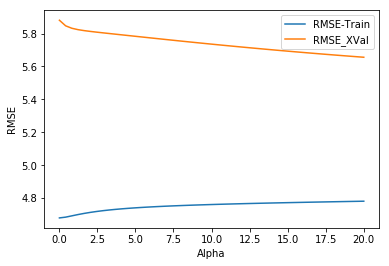

In [23]:
pl.plot(alpha, t_rmse, label='RMSE-Train')
pl.plot(alpha, cv_rmse, label='RMSE_XVal')
pl.legend( ('RMSE-Train', 'RMSE_XVal') )
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.show()

In [25]:
# To make comparisons across methods easier, let's parametrize the regression methods:
a = 0.3
for name,met in [
        ('linear regression', LinearRegression()),
        ('lasso', Lasso(fit_intercept=True, alpha=a)),
        ('ridge', Ridge(fit_intercept=True, alpha=a)),
        ('elastic-net', ElasticNet(fit_intercept=True, alpha=a))
        ]:
    met.fit(x,y)
    # p = np.array([met.predict(xi) for xi in x])
    p = met.predict(x)
    e = p-y
    total_error = np.dot(e,e)
    rmse_train = np.sqrt(total_error/len(p))

    kf = KFold(len(x), n_folds=10)
    err = 0
    for train,test in kf:
        met.fit(x[train],y[train])
        p = met.predict(x[test])
        e = p-y[test]
        err += np.dot(e,e)

    rmse_10cv = np.sqrt(err/len(x))
    print('Method: %s' %name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    print("\n")

Method: linear regression
RMSE on training: 4.6795
RMSE on 10-fold CV: 5.8819


Method: lasso
RMSE on training: 4.8570
RMSE on 10-fold CV: 5.7675


Method: ridge
RMSE on training: 4.6822
RMSE on 10-fold CV: 5.8535


Method: elastic-net
RMSE on training: 4.9072
RMSE on 10-fold CV: 5.4936




In [26]:
# Now let's try to do regression via Stochastic Gradient Descent.
# SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_s = scaler.transform(x)

sgdreg = SGDRegressor(penalty='l2', alpha=0.15, n_iter=200)

# Compute RMSE on training data
sgdreg.fit(x_s,y)
p = sgdreg.predict(x_s)
err = p-y
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(x[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(x[train])
    xtest_s = scaler.transform(x[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y[train])
    p = sgdreg.predict(xtest_s)
    e = p-y[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 4.8082
RMSE on 10-fold CV: 5.5818


In [35]:
# standard regressions
def standRegres(xArr,yArr):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

w = standRegres(x,y)
print(w)

[[-1.07170557e-01]
 [ 4.63952195e-02]
 [ 2.08602395e-02]
 [ 2.68856140e+00]
 [-1.77957587e+01]
 [ 3.80475246e+00]
 [ 7.51061703e-04]
 [-1.47575880e+00]
 [ 3.05655038e-01]
 [-1.23293463e-02]
 [-9.53463555e-01]
 [ 9.39251272e-03]
 [-5.25466633e-01]
 [ 3.64911033e+01]]


In [30]:
def ridgeRegres(xArr,yArr,lam=0.2):
    xMat = np.mat(xArr); yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

w_ridge = ridgeRegres(x,y,0.5)
print(w_ridge)

[[-1.00258044e-01]
 [ 4.76559911e-02]
 [-6.63573226e-04]
 [ 2.68040479e+00]
 [-9.55123875e+00]
 [ 4.55214996e+00]
 [-4.67446118e-03]
 [-1.25507957e+00]
 [ 2.52066137e-01]
 [-1.15766049e-02]
 [-7.26125030e-01]
 [ 1.14804636e-02]
 [-4.92130481e-01]
 [ 2.17772079e+01]]


In [36]:
# compute prediction

xMat=np.mat(x)
yMat=np.mat(y)
yHat = xMat*w_ridge

In [37]:
print(yHat[0:10])

[[29.80808276]
 [24.75277329]
 [30.78188454]
 [29.12268607]
 [28.60788228]
 [25.35402577]
 [22.47871664]
 [19.28185025]
 [11.2059811 ]
 [18.64883549]]


In [38]:
print(yMat.T[0:10])

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]]
